In [11]:
import pandas as pd
import numpy as np

from prince import MCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [12]:
df = pd.read_csv(r'/Users/chetan/Desktop/DSE Projects/Mental Health Case Study/Mental Health Dataset.csv')
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


## Pre-Processing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

## Convert to Strings (MCA requirement)

In [15]:
# These are the features we will use for clustering
features = ['family_history', 'treatment', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings', 
            'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

In [16]:
# Select only these columns from the dataset and remove missing values
X_raw = df[features].dropna().reset_index(drop=True)
print("Shape after dropna:", X_raw.shape)

Shape after dropna: (292364, 8)


In [17]:
# Ensure all columns are string/object dtype for MCA

X_cat = X_raw.astype(str)

In [18]:
# Check unique values
for col in X_cat.columns:
    print(col, "unique:", X_cat[col].nunique())

family_history unique: 2
treatment unique: 2
Growing_Stress unique: 3
Changes_Habits unique: 3
Mood_Swings unique: 3
Coping_Struggles unique: 2
Work_Interest unique: 3
Social_Weakness unique: 3


In [19]:
# Display first few rows
X_cat.head()

,family_history,treatment,Growing_Stress,Changes_Habits,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,No,Yes,Yes,No,Medium,No,No,Yes
1,Yes,Yes,Yes,No,Medium,No,No,Yes
2,Yes,Yes,Yes,No,Medium,No,No,Yes
3,Yes,Yes,Yes,No,Medium,No,No,Yes
4,Yes,Yes,Yes,No,Medium,No,No,Yes


## Apply MCA (Dimensionality Reduction)

In [20]:
# MCA - choose number of components (start small, 3-6)
n_mca_components = 3   # try 3..6; we will inspect explained inertia later

mca = MCA(n_components=n_mca_components, random_state=42)
X_mca = mca.fit_transform(X_cat)   # returns a pandas DataFrame-like object

# Convert to numpy array for sklearn
X_mca_arr = np.asarray(X_mca)

print("MCA components shape:", X_mca_arr.shape)

MCA components shape: (292364, 3)


## Scale MCA Components for KMeans

In [21]:
# Scaling — KMeans sometimes benefits from scaling
scaler = StandardScaler()
X_mca_scaled = scaler.fit_transform(X_mca_arr)

## Select Optimal K using Elbow + Silhouette

K=2 inertia=657325 silhouette(sample)=0.2556
K=3 inertia=515841 silhouette(sample)=0.2673
K=4 inertia=399454 silhouette(sample)=0.2883
K=5 inertia=344318 silhouette(sample)=0.2807
K=6 inertia=295475 silhouette(sample)=0.2884
K=7 inertia=263701 silhouette(sample)=0.2846


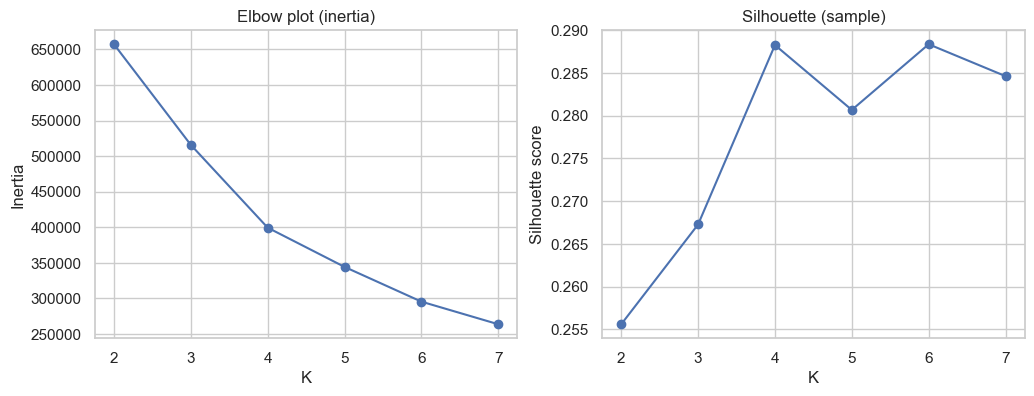

In [22]:
# find good K using elbow + silhouette. For large datasets, sample for silhouette.

from sklearn.metrics import pairwise_distances

inertia_list = []
silhouette_list = []
K_range = range(2, 8)   # try 2..7 clusters

# If dataset is large, sample for silhouette computations
n_samples_for_silhouette = 5000
rng = np.random.RandomState(42)
if X_mca_scaled.shape[0] > n_samples_for_silhouette:
    sample_idx = rng.choice(X_mca_scaled.shape[0], n_samples_for_silhouette, replace=False)
    X_sample = X_mca_scaled[sample_idx]
else:
    X_sample = X_mca_scaled

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_mca_scaled)
    inertia_list.append(km.inertia_)
    # silhouette on sample only
    labels_sample = km.predict(X_sample)
    sil = silhouette_score(X_sample, labels_sample)
    silhouette_list.append(sil)
    print(f"K={k} inertia={km.inertia_:.0f} silhouette(sample)={sil:.4f}")

# Plot results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertia_list, marker='o')
plt.title("Elbow plot (inertia)")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(list(K_range), silhouette_list, marker='o')
plt.title("Silhouette (sample)")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.show()

## Train Final KMeans Model

In [23]:
# Set final K (choose based on previous outputs)
best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(X_mca_scaled)

# Attach to original dataframe
X_result = X_raw.copy()
X_result['Cluster'] = kmeans_labels
print("Cluster sizes:\n", X_result['Cluster'].value_counts().sort_index())

Cluster sizes:
 Cluster
0     98348
1     84545
2    109471
Name: count, dtype: int64


## Generate Cluster Profiles

In [24]:
# Cluster purity (dominant category percentage per feature)

def profile(series):
    vc = series.value_counts(normalize=True)
    return f"{vc.index[0]} ({vc.iloc[0]:.0%})"

cluster_profiles = X_result.groupby("Cluster").agg({col: profile for col in features})
cluster_profiles["Size"] = X_result["Cluster"].value_counts().sort_index()
cluster_profiles


,family_history,treatment,Growing_Stress,Changes_Habits,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Size
Cluster,,,,,,,,,
0,No (85%),No (70%),Maybe (53%),Yes (41%),Medium (44%),No (78%),No (54%),Maybe (49%),98348
1,Yes (100%),Yes (100%),Yes (35%),Yes (37%),Medium (34%),No (52%),No (36%),Maybe (35%),84545
2,No (85%),No (70%),No (48%),No (34%),Low (47%),Yes (69%),Maybe (56%),Yes (40%),109471


## Deployment

In [ ]:
import joblib

# Export all required files to import in VSC (Streamlit)
joblib.dump(mca, "mca_transformer.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(kmeans, "kmeans_model.joblib")

# Save cluster profiles for UI display
cluster_profiles.to_csv("cluster_profiles.csv")

# Save category options for UI dropdowns
X_cat.to_csv("category_values.csv", index=False)

print("Export complete: Models + profiles saved.")

Export complete: Models + profiles saved.


In [27]:
# Save only unique categorical values for UI
category_values = {col: sorted(X_cat[col].unique()) for col in features}
pd.DataFrame(dict([(k, pd.Series(v)) for k,v in category_values.items()])).to_csv("ui_categories.csv", index=False)